In [40]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydotplus



In [81]:
train = pd.read_csv('C:\\Users\\Pavani Gangula\\Desktop\\ML-2_Assignment_Loan_prediction\\train.csv')
test = pd.read_csv('C:\\Users\\Pavani Gangula\\Desktop\\ML-2_Assignment_Loan_prediction\\test.csv')

In [82]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [83]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [84]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [85]:
import fancyimpute

In [86]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [87]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [88]:
def complete_data():
    train = pd.read_csv('C:\\Users\\Pavani Gangula\\Desktop\\ML-2_Assignment_Loan_prediction\\train.csv')
    test = pd.read_csv("C:\\Users\\Pavani Gangula\\Desktop\\ML-2_Assignment_Loan_prediction\\test.csv")
    targets =  train.Loan_Status
    train.drop('Loan_Status',1,inplace= True) # dropping 'loan_status' variable
    complete = train.append(test)             # combining train and test data
    complete.reset_index(inplace = True)
    complete.drop(['index','Loan_ID'],inplace=True, axis =1) # dropping loan-ID and index
    return complete

In [89]:
complete = complete_data()

In [90]:
complete.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban


In [91]:
complete["Married"].value_counts()   

Yes    631
No     347
Name: Married, dtype: int64

In [92]:
complete['Married'].isnull().sum()

3

In [93]:
def mv_marital_status():        #categorical variables can be best imputed with mode.As mode is 'Yes',
    global complete             # imputing missing values with 'yes'
    complete['Married'].fillna('Yes',inplace= True)

In [94]:
mv_marital_status()

In [95]:
complete['Married'].value_counts()

Yes    634
No     347
Name: Married, dtype: int64

In [96]:
complete['Married'].isnull().sum()

0

In [73]:
complete['Gender'].value_counts()

Male      775
Female    182
Name: Gender, dtype: int64

In [97]:
complete['Gender'].isnull().sum()

24

In [104]:
def mv_gender():         # Mode for 'Gender' is Male. Hence imputing M.Vs with 'Male'
    global complete
    complete['Gender'].fillna('Male',inplace=True)
    

In [105]:
mv_gender()

In [107]:
complete['Gender'].value_counts()

Male      799
Female    182
Name: Gender, dtype: int64

In [106]:
complete['Gender'].isnull().sum()

0

In [121]:
complete['LoanAmount'].isnull().sum()

27

In [113]:
from matplotlib import pyplot as plt
%matplotlib inline


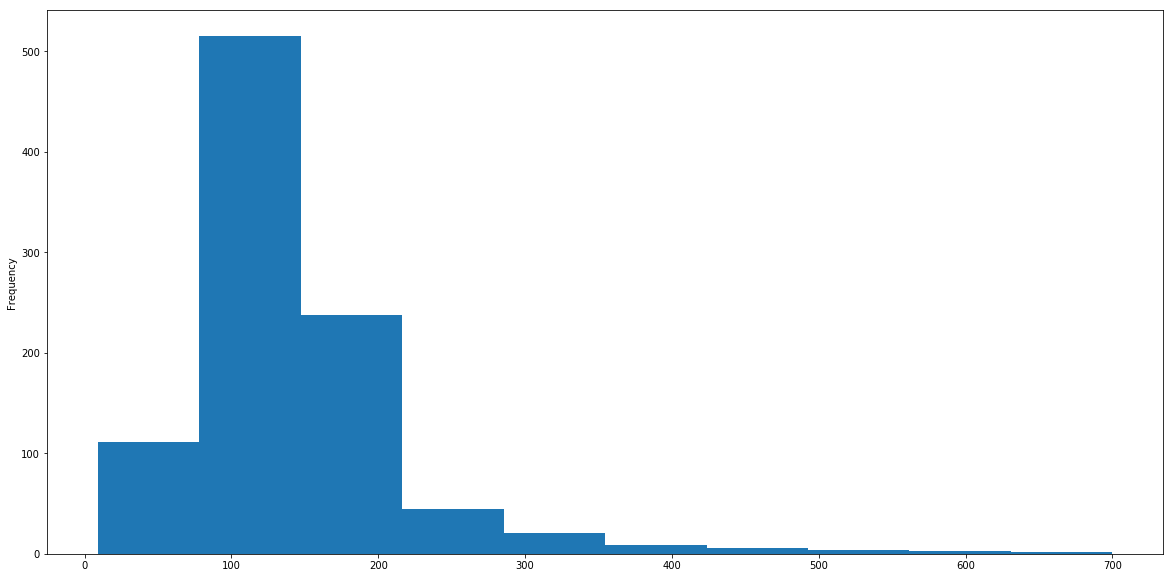

In [118]:
complete['LoanAmount'].plot(kind='hist',figsize = (20,10))

In [122]:
def mv_loan_amount():       #imputing missing value in 'LoanAmount' with median as the 
    global complete         # data is positively skewed. 
    complete['LoanAmount'].fillna(complete['LoanAmount'].median(), inplace=True)

In [123]:
mv_loan_amount()

In [124]:
complete['LoanAmount'].isnull().sum()

0

In [125]:
complete['Credit_History'].value_counts()

1.0    754
0.0    148
Name: Credit_History, dtype: int64

In [126]:
complete['Credit_History'].isnull().sum()

79

In [127]:
def mv_credit_history():     # Mode for 'credit_history' is 1. So imputing M.Vs with 1
    global complete
    complete['Credit_History'].fillna(1,inplace=True)

In [128]:
mv_credit_history()

In [129]:
complete['Credit_History'].isnull().sum()

0

In [130]:
complete['Credit_History'].value_counts()

1.0    833
0.0    148
Name: Credit_History, dtype: int64

In [131]:
complete['Self_Employed'].value_counts()

No     807
Yes    119
Name: Self_Employed, dtype: int64

In [132]:
complete['Self_Employed'].isnull().sum()

55

In [135]:
def mv_employment(): # Mode for 'Self_Employed' variable is 'No'. 
    global complete     
    complete['Self_Employed'].fillna('No',inplace = True)

In [136]:
mv_employment()

In [137]:
complete['Self_Employed'].isnull().sum()

0

In [138]:
complete['Self_Employed'].value_counts()

No     862
Yes    119
Name: Self_Employed, dtype: int64

In [140]:
complete.isnull().sum()

Gender                0
Married               0
Dependents           25
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     20
Credit_History        0
Property_Area         0
dtype: int64

In [141]:
def process_gender():
    global complete
    complete['Gender'] = complete['Gender'].map({'Male':1,'Female':0})

In [142]:
process_gender()
complete.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,No,0,Graduate,No,5849,0.0,126.0,360.0,1.0,Urban
1,1,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,1,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,1,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,1,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban


In [143]:
def marital_status():
    global complete
    complete['Married'] = complete['Married'].map({'Yes':1,'No':0})

In [144]:
marital_status()
complete.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,Graduate,No,5849,0.0,126.0,360.0,1.0,Urban
1,1,1,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,1,1,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,1,1,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,1,0,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban


In [145]:
def dependents():
    global complete
    complete['Singleton'] = complete['Dependents'].map(lambda d: 1 if d=='1' else 0)
    complete['Small_Family'] = complete['Dependents'].map(lambda d: 1 if d=='2' else 0)
    complete['Large_Family'] = complete['Dependents'].map(lambda d: 1 if d=='3+' else 0)
    complete.drop(['Dependents'], axis=1, inplace=True)

In [146]:
dependents()
complete.head(10)

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Singleton,Small_Family,Large_Family
0,1,0,Graduate,No,5849,0.0,126.0,360.0,1.0,Urban,0,0,0
1,1,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,1,0,0
2,1,1,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,0,0,0
3,1,1,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,0,0,0
4,1,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,0,0,0
5,1,1,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,0,1,0
6,1,1,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,0,0,0
7,1,1,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,0,0,1
8,1,1,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,0,1,0
9,1,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,1,0,0


In [147]:
def education():
    global complete
    complete['Education'] = complete['Education'].map({'Graduate':1,'Not Graduate':0})

In [148]:
education()
complete.head(10)

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Singleton,Small_Family,Large_Family
0,1,0,1,No,5849,0.0,126.0,360.0,1.0,Urban,0,0,0
1,1,1,1,No,4583,1508.0,128.0,360.0,1.0,Rural,1,0,0
2,1,1,1,Yes,3000,0.0,66.0,360.0,1.0,Urban,0,0,0
3,1,1,0,No,2583,2358.0,120.0,360.0,1.0,Urban,0,0,0
4,1,0,1,No,6000,0.0,141.0,360.0,1.0,Urban,0,0,0
5,1,1,1,Yes,5417,4196.0,267.0,360.0,1.0,Urban,0,1,0
6,1,1,0,No,2333,1516.0,95.0,360.0,1.0,Urban,0,0,0
7,1,1,1,No,3036,2504.0,158.0,360.0,0.0,Semiurban,0,0,1
8,1,1,1,No,4006,1526.0,168.0,360.0,1.0,Urban,0,1,0
9,1,1,1,No,12841,10968.0,349.0,360.0,1.0,Semiurban,1,0,0


In [149]:
def employment():
    global complete
    complete['Self_Employed'] = complete['Self_Employed'].map({'Yes':1,'No':0})

In [150]:
employment()
complete.head(10)

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Singleton,Small_Family,Large_Family
0,1,0,1,0,5849,0.0,126.0,360.0,1.0,Urban,0,0,0
1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,Rural,1,0,0
2,1,1,1,1,3000,0.0,66.0,360.0,1.0,Urban,0,0,0
3,1,1,0,0,2583,2358.0,120.0,360.0,1.0,Urban,0,0,0
4,1,0,1,0,6000,0.0,141.0,360.0,1.0,Urban,0,0,0
5,1,1,1,1,5417,4196.0,267.0,360.0,1.0,Urban,0,1,0
6,1,1,0,0,2333,1516.0,95.0,360.0,1.0,Urban,0,0,0
7,1,1,1,0,3036,2504.0,158.0,360.0,0.0,Semiurban,0,0,1
8,1,1,1,0,4006,1526.0,168.0,360.0,1.0,Urban,0,1,0
9,1,1,1,0,12841,10968.0,349.0,360.0,1.0,Semiurban,1,0,0


In [151]:
def income():
    global complete
    complete['Total_Income'] = complete['ApplicantIncome'] + complete['CoapplicantIncome']
    complete.drop(['ApplicantIncome','CoapplicantIncome'], axis=1, inplace=True)

In [152]:
income()
complete.head(10)

,Gender,Married,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Singleton,Small_Family,Large_Family,Total_Income
0,1,0,1,0,126.0,360.0,1.0,Urban,0,0,0,5849.0
1,1,1,1,0,128.0,360.0,1.0,Rural,1,0,0,6091.0
2,1,1,1,1,66.0,360.0,1.0,Urban,0,0,0,3000.0
3,1,1,0,0,120.0,360.0,1.0,Urban,0,0,0,4941.0
4,1,0,1,0,141.0,360.0,1.0,Urban,0,0,0,6000.0
5,1,1,1,1,267.0,360.0,1.0,Urban,0,1,0,9613.0
6,1,1,0,0,95.0,360.0,1.0,Urban,0,0,0,3849.0
7,1,1,1,0,158.0,360.0,0.0,Semiurban,0,0,1,5540.0
8,1,1,1,0,168.0,360.0,1.0,Urban,0,1,0,5532.0
9,1,1,1,0,349.0,360.0,1.0,Semiurban,1,0,0,23809.0


In [153]:
def loan_amount():
    global complete
    complete['Debt_Income_Ratio'] = complete['Total_Income'] / complete['LoanAmount']

In [154]:
loan_amount()
complete.head(10)

,Gender,Married,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Singleton,Small_Family,Large_Family,Total_Income,Debt_Income_Ratio
0,1,0,1,0,126.0,360.0,1.0,Urban,0,0,0,5849.0,46.420635
1,1,1,1,0,128.0,360.0,1.0,Rural,1,0,0,6091.0,47.585938
2,1,1,1,1,66.0,360.0,1.0,Urban,0,0,0,3000.0,45.454545
3,1,1,0,0,120.0,360.0,1.0,Urban,0,0,0,4941.0,41.175000
4,1,0,1,0,141.0,360.0,1.0,Urban,0,0,0,6000.0,42.553191
5,1,1,1,1,267.0,360.0,1.0,Urban,0,1,0,9613.0,36.003745
6,1,1,0,0,95.0,360.0,1.0,Urban,0,0,0,3849.0,40.515789
7,1,1,1,0,158.0,360.0,0.0,Semiurban,0,0,1,5540.0,35.063291
8,1,1,1,0,168.0,360.0,1.0,Urban,0,1,0,5532.0,32.928571
9,1,1,1,0,349.0,360.0,1.0,Semiurban,1,0,0,23809.0,68.220630


In [155]:
complete['Loan_Amount_Term'].value_counts()

360.0    823
180.0     66
480.0     23
300.0     20
240.0      8
84.0       7
120.0      4
36.0       3
60.0       3
12.0       2
350.0      1
6.0        1
Name: Loan_Amount_Term, dtype: int64

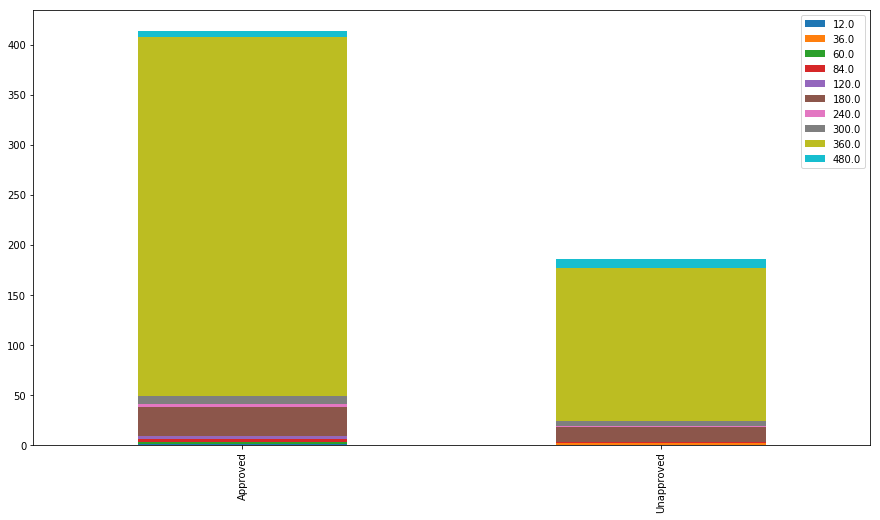

In [157]:
approved_term  = train[train['Loan_Status']=='Y']['Loan_Amount_Term'].value_counts()
unapproved_term = train[train['Loan_Status']=='N']['Loan_Amount_Term'].value_counts()
df = pd.DataFrame([approved_term,unapproved_term])
df.index = ['Approved','Unapproved']
df.plot(kind='bar', stacked=True, figsize=(15,8))

In [158]:
def loan_term():
    global complete
    complete['Very_Short_Term'] = complete['Loan_Amount_Term'].map(lambda t: 1 if t<=60 else 0)
    complete['Short_Term'] = complete['Loan_Amount_Term'].map(lambda t: 1 if t>60 and t<180 else 0)
    complete['Long_Term'] = complete['Loan_Amount_Term'].map(lambda t: 1 if t>=180 and t<=300  else 0)
    complete['Very_Long_Term'] = complete['Loan_Amount_Term'].map(lambda t: 1 if t>300 else 0)
    complete.drop('Loan_Amount_Term', axis=1, inplace=True)

In [159]:
loan_term()
complete.head()

,Gender,Married,Education,Self_Employed,LoanAmount,Credit_History,Property_Area,Singleton,Small_Family,Large_Family,Total_Income,Debt_Income_Ratio,Very_Short_Term,Short_Term,Long_Term,Very_Long_Term
0,1,0,1,0,126.0,1.0,Urban,0,0,0,5849.0,46.420635,0,0,0,1
1,1,1,1,0,128.0,1.0,Rural,1,0,0,6091.0,47.585938,0,0,0,1
2,1,1,1,1,66.0,1.0,Urban,0,0,0,3000.0,45.454545,0,0,0,1
3,1,1,0,0,120.0,1.0,Urban,0,0,0,4941.0,41.175000,0,0,0,1
4,1,0,1,0,141.0,1.0,Urban,0,0,0,6000.0,42.553191,0,0,0,1


In [160]:
def credit_history():
    global complete
    complete['Credit_History_Bad'] = complete['Credit_History'].map(lambda c: 1 if c==0 else 0)
    complete['Credit_History_Good'] = complete['Credit_History'].map(lambda c: 1 if c==1 else 0)
    complete['Credit_History_Unknown'] = complete['Credit_History'].map(lambda c: 1 if c==2 else 0)
    complete.drop('Credit_History', axis=1, inplace=True)

In [161]:
credit_history()
complete.head()

,Gender,Married,Education,Self_Employed,LoanAmount,Property_Area,Singleton,Small_Family,Large_Family,Total_Income,Debt_Income_Ratio,Very_Short_Term,Short_Term,Long_Term,Very_Long_Term,Credit_History_Bad,Credit_History_Good,Credit_History_Unknown
0,1,0,1,0,126.0,Urban,0,0,0,5849.0,46.420635,0,0,0,1,0,1,0
1,1,1,1,0,128.0,Rural,1,0,0,6091.0,47.585938,0,0,0,1,0,1,0
2,1,1,1,1,66.0,Urban,0,0,0,3000.0,45.454545,0,0,0,1,0,1,0
3,1,1,0,0,120.0,Urban,0,0,0,4941.0,41.175000,0,0,0,1,0,1,0
4,1,0,1,0,141.0,Urban,0,0,0,6000.0,42.553191,0,0,0,1,0,1,0


In [162]:
def property_area():
    global complete
    property_area_dummies = pd.get_dummies(complete['Property_Area'], prefix='Property')
    complete = pd.concat([complete, property_area_dummies], axis=1)
    complete.drop('Property_Area', axis=1, inplace=True) 

In [163]:
property_area()
complete.head()

,Gender,Married,Education,Self_Employed,LoanAmount,Singleton,Small_Family,Large_Family,Total_Income,Debt_Income_Ratio,Very_Short_Term,Short_Term,Long_Term,Very_Long_Term,Credit_History_Bad,Credit_History_Good,Credit_History_Unknown,Property_Rural,Property_Semiurban,Property_Urban
0,1,0,1,0,126.0,0,0,0,5849.0,46.420635,0,0,0,1,0,1,0,0,0,1
1,1,1,1,0,128.0,1,0,0,6091.0,47.585938,0,0,0,1,0,1,0,1,0,0
2,1,1,1,1,66.0,0,0,0,3000.0,45.454545,0,0,0,1,0,1,0,0,0,1
3,1,1,0,0,120.0,0,0,0,4941.0,41.175000,0,0,0,1,0,1,0,0,0,1
4,1,0,1,0,141.0,0,0,0,6000.0,42.553191,0,0,0,1,0,1,0,0,0,1


In [164]:
complete

,Gender,Married,Education,Self_Employed,LoanAmount,Singleton,Small_Family,Large_Family,Total_Income,Debt_Income_Ratio,Very_Short_Term,Short_Term,Long_Term,Very_Long_Term,Credit_History_Bad,Credit_History_Good,Credit_History_Unknown,Property_Rural,Property_Semiurban,Property_Urban
0,1,0,1,0,126.0,0,0,0,5849.0,46.420635,0,0,0,1,0,1,0,0,0,1
1,1,1,1,0,128.0,1,0,0,6091.0,47.585938,0,0,0,1,0,1,0,1,0,0
2,1,1,1,1,66.0,0,0,0,3000.0,45.454545,0,0,0,1,0,1,0,0,0,1
3,1,1,0,0,120.0,0,0,0,4941.0,41.175000,0,0,0,1,0,1,0,0,0,1
4,1,0,1,0,141.0,0,0,0,6000.0,42.553191,0,0,0,1,0,1,0,0,0,1
5,1,1,1,1,267.0,0,1,0,9613.0,36.003745,0,0,0,1,0,1,0,0,0,1
6,1,1,0,0,95.0,0,0,0,3849.0,40.515789,0,0,0,1,0,1,0,0,0,1
7,1,1,1,0,158.0,0,0,1,5540.0,35.063291,0,0,0,1,1,0,0,0,1,0
8,1,1,1,0,168.0,0,1,0,5532.0,32.928571,0,0,0,1,0,1,0,0,0,1
9,1,1,1,0,349.0,1,0,0,23809.0,68.220630,0,0,0,1,0,1,0,0,1,0


In [165]:
def feature_scaling(df):
    df -= df.min()
    df /= df.max()
    return df

In [166]:
complete['LoanAmount'] = feature_scaling(complete['LoanAmount'])
complete['Total_Income'] = feature_scaling(complete['Total_Income'])
complete['Debt_Income_Ratio'] = feature_scaling(complete['Debt_Income_Ratio'])

In [167]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

In [168]:
def compute_score(clf, X, y, scoring='accuracy'):
    xval = cross_val_score(clf, X, y, cv = 5, scoring=scoring)
    return np.mean(xval)

In [171]:
def recover_train_test_target():
    global complete, train
    targets = train['Loan_Status'].map({'Y':1,'N':0})
    train = complete.head(614)
    test = complete.iloc[614:]
    return train, test, targets

In [172]:
train, test, targets = recover_train_test_target()

In [173]:
clf = RandomForestClassifier(n_estimators=50, max_features='sqrt')
clf = clf.fit(train, targets)

In [174]:
features = pd.DataFrame()
features['Feature'] = train.columns
features['Importance'] = clf.feature_importances_
features.sort_values(by=['Importance'], ascending=False, inplace=True)
features.set_index('Feature', inplace=True)

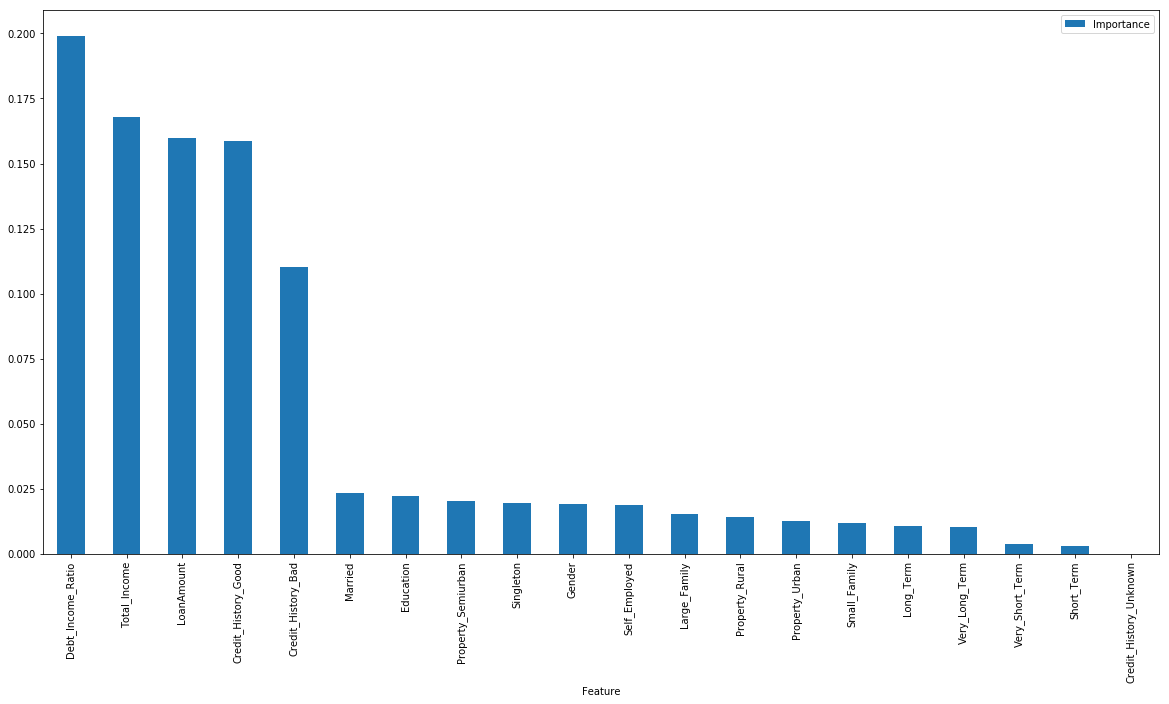

In [175]:
features.plot(kind='bar', figsize=(20, 10))

In [176]:
model = SelectFromModel(clf, prefit=True)
train_reduced = model.transform(train)
train_reduced.shape

(614, 5)

In [177]:
test_reduced = model.transform(test)
test_reduced.shape

(367, 5)

In [198]:
parameters = {'bootstrap': False,
              'min_samples_leaf': 3,
              'n_estimators': 50,
              'min_samples_split': 10,
              'max_features': 'sqrt',
              'max_depth': 6}

model = RandomForestClassifier(**parameters)
model.fit(train, targets)

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=6, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [200]:
compute_score(model, train, targets, scoring='accuracy')

0.8030407191961924

In [201]:
output = model.predict(test).astype(int)
df_output = pd.DataFrame()
aux = pd.read_csv('C:\\Users\\Pavani Gangula\\Desktop\\ML-2_Assignment_Loan_prediction\\test.csv')
df_output['Loan_ID'] = aux['Loan_ID']
df_output['Loan_Status'] = np.vectorize(lambda s: 'Y' if s==1 else 'N')(output)
df_output[['Loan_ID','Loan_Status']].to_csv('LP-output.csv',index=False)